In [1]:
import numpy as np 
import stream_analysis as sa
import gcs
from gcs import path_handler as ph 
import matplotlib.pyplot as plt
import profile_detections 

import ipywidgets as widgets
from ipywidgets import interact

In [20]:
montecarlokey="monte-carlo-000"
dataparams = {
    "montecarlokey":montecarlokey,
    "GCname":"Pal5",
    "NP":int(1e5),
    "MWpotential0":"pouliasis2017pii",
    "MWpotential1":"pouliasis2017pii-GCNBody",
    "internal_dynamics":"isotropic-plummer"
}
## HYPER PARAMETERS

hyperparams = {
    "xlims":[-10,10],
    "ylims":[-0.5,0.5],
    "noise_factor":50,
    "sigma":2,
    "box_length":20,
    "do_cross_correlation":False,
    "N_APPlY":2}

In [21]:
# extract the raw data
tails,distributions,raw_profiles=profile_detections.extract_raw_data(dataparams,hyperparams)

In [22]:
sigma,xlims,ylims,noise_factor,box_length,do_cross_correlation,N_APPlY = profile_detections.unpack_hyperparams(hyperparams)

In [23]:
# unpack the data
(X0,Y0,H0),(X1,Y1,H1)=distributions
x0,c0,c1 = raw_profiles

In [24]:
properties=profile_detections.assemle_plot_properties(dataparams,hyperparams)

In [25]:
# clean up the profiles
profiles                =   sa.density_profile_gap_detections.clean_up_stream_profiles(x0,c0,c1,box_length,N_APPlY,do_cross_correlation)
CENTERS,CONTROL,COMPARE =   profiles
# DETECTION CANDIDATES 
noise_filtered_profiles,noiselevel,candidates=sa.density_profile_gap_detections.log_difference_detection(profiles,noise_factor,sigma)
centers,compare,control = noise_filtered_profiles

In [26]:

def update_plot(sigma,noise_factor,box_length):
    fig,ax0,ax1,ax2,cbar_ax = sa.plotters.tailcoordinates.gspec_double_xy_profile()
    profile_detections.append2Dmaps([fig,ax0,ax1,cbar_ax],distributions,properties['append2Dmaps'])
    profiles                =   sa.density_profile_gap_detections.clean_up_stream_profiles(x0,c0,c1,box_length,N_APPlY,do_cross_correlation)
    CENTERS,CONTROL,COMPARE =   profiles
    noise_filtered_profiles,noiselevel,candidates=sa.density_profile_gap_detections.log_difference_detection(profiles,noise_factor,sigma)
    centers,compare,control             =  noise_filtered_profiles
    data_add_gap_candidates_to_profiles =  (centers,compare,control,candidates)
    data_append1Dprofiles               =  (CENTERS,CONTROL,COMPARE,noiselevel)
    candidate_indexes                   = np.where(candidates)[0]
    
    profile_detections.append1Dprofiles((ax2),data_append1Dprofiles,properties['append1Dprofiles'])
    profile_detections.add_gap_candidates_to_profiles((ax2),(centers,compare,control,candidate_indexes),properties['add_gap_candidates_to_profiles'])
    profile_detections.add_gap_candidates_to_2D_plot((ax1),(centers,candidate_indexes),properties['add_gap_candidates_to_2D_plot'])
    ax2.legend()

sigma_slider = widgets.FloatSlider(value=1, min=1, max=4, step=0.1, description='Sigma Threshold')
noise_factor_slider = widgets.FloatSlider(value=50, min=1, max=150, step=1, description='Noise Factor Threshold')
box_length_slider = widgets.IntSlider(value=5, min=1, max=50, step=1, description='Box car length')
interactive_plot = widgets.interactive(update_plot, sigma=sigma_slider,noise_factor=noise_factor_slider,box_length=box_length_slider)
display(interactive_plot)
plt.show()

interactive(children=(FloatSlider(value=1.0, description='Sigma Threshold', max=4.0, min=1.0), FloatSlider(val…

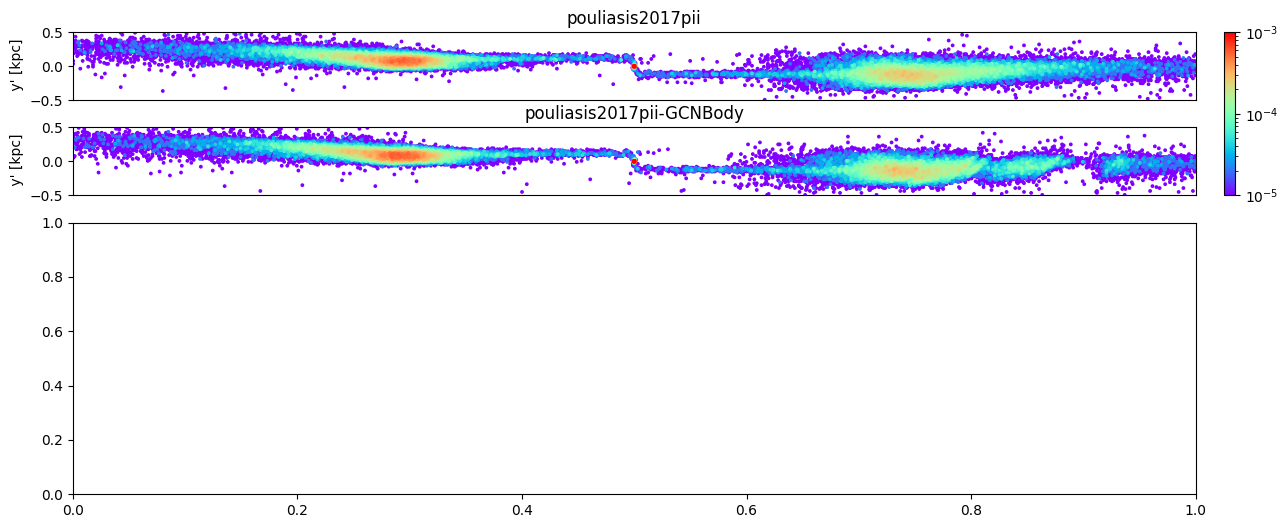

interactive(children=(FloatSlider(value=1.0, description='Sigma Threshold', max=4.0, min=1.0), Output()), _dom…

In [9]:
# Initialize the figure and subplots outside the function
fig, ax0, ax1, ax2, cbar_ax = sa.plotters.tailcoordinates.gspec_double_xy_profile()
profile_detections.append2Dmaps([fig, ax0, ax1, cbar_ax], distributions, properties['append2Dmaps'])

# Create a function to update only the necessary parts of the plot
def update_plot(sigma, fig, ax0, ax1, ax2):
    noise_filtered_profiles, noiselevel, candidates = sa.density_profile_gap_detections.log_difference_detection(profiles, noise_factor, sigma)
    centers, compare, control = noise_filtered_profiles
    data_add_gap_candidates_to_profiles = (centers, compare, control, candidates)
    data_append1Dprofiles = (CENTERS, CONTROL, COMPARE, noiselevel)
    candidate_indexes = np.where(candidates)[0]
    
    # Clear previous plots in ax2
    ax2.clear()
    
    # Update the 1D profiles and gap candidatesa
    profile_detections.append1Dprofiles(ax2, data_append1Dprofiles, properties['append1Dprofiles'])
    profile_detections.add_gap_candidates_to_profiles(ax2, (centers, compare, control, candidate_indexes), properties['add_gap_candidates_to_profiles'])
    profile_detections.add_gap_candidates_to_2D_plot(ax1, (centers, candidate_indexes), properties['add_gap_candidates_to_2D_plot'])
    
    ax2.legend()
    fig.canvas.draw_idle()

# Create interactive slider
sigma_slider = widgets.FloatSlider(value=1, min=1, max=4, step=0.1, description='Sigma Threshold')

# Link the slider to the update_plot function and pass the figure and axes
    # Update the 1D profiles and gap candidates
interactive_plot = widgets.interactive(update_plot, sigma=sigma_slider, fig=widgets.fixed(fig), ax0=widgets.fixed(ax0), ax1=widgets.fixed(ax1), ax2=widgets.fixed(ax2))

# Display the interactive plot and the slider
display(interactive_plot)
plt.show()